# A manifold for surface grasping symmetrical objects

This notebook demonstrates how the pregrasp manifold for circular objects works. To install the required libraries run:

```pip3 install transformations matplotlib numpy```

In [1]:
import transformations as tra
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
FIGURE_SIZE = (9, 9)

Uncomment this to plot in separate windows instead of the notebook. Requires pyqt5, install with `sudo apt-get install python3-pyqt5`.

In [3]:
# %matplotlib qt

In [4]:
# Decompose the frame into position, x direction, y direction, z direction
def decompose_frame(frame):
    return frame[:3, 3], frame[:3, 0], frame[:3, 1], frame[:3, 2]

# Plot a frame in a 3d axes
def plot_frame(ax, transformation, length, to_plot=[0, 1, 2]):
    axes = decompose_frame(transformation)
    colors = 'rgb'
    
    for i in to_plot:
        ax.quiver(axes[0][0], axes[0][1], axes[0][2], 
                  axes[i+1][0], axes[i+1][1], axes[i+1][2], 
                  color=colors[i], length=length)

# Plot a vector in a 2d axes
def plot_vector(ax, base, direction):
    ax.quiver(base[0], base[1], direction[0], direction[1])

# Sample position from a circle with direction pointing towards the center
def sample_position_in_radius(center, radius):
    r = np.sqrt(np.random.random_sample()) * radius
    phi = np.random.random_sample() * 2 * np.pi
    
    sampled_direction = np.array([np.cos(phi), np.sin(phi)])
    return center + r * sampled_direction, phi

# Sample a frame that lies in the plane defined by the center_frame X and Y axes 
# and the frame origin point. Rotate the X axis of the sampled frame such that 
# it points in the direction of the origin of the frame.
def sample_frame_on_xy_disk(center_frame, radius):
    position, x, y, z = decompose_frame(center_frame)
    sampled_disk_position, phi = sample_position_in_radius([0, 0], radius)
    sampled_position = np.stack([x, y, z]).T.dot([sampled_disk_position[0], sampled_disk_position[1], 0])
    
    sampled_frame = center_frame.copy()
    sampled_frame[0:3, 3] += sampled_position
    sampled_frame = sampled_frame.dot(tra.rotation_matrix(angle=-np.pi + phi, direction=[0, 0, 1]))
    return sampled_frame

This demonstrates how the positions and X axis directions are sampled on the circle.

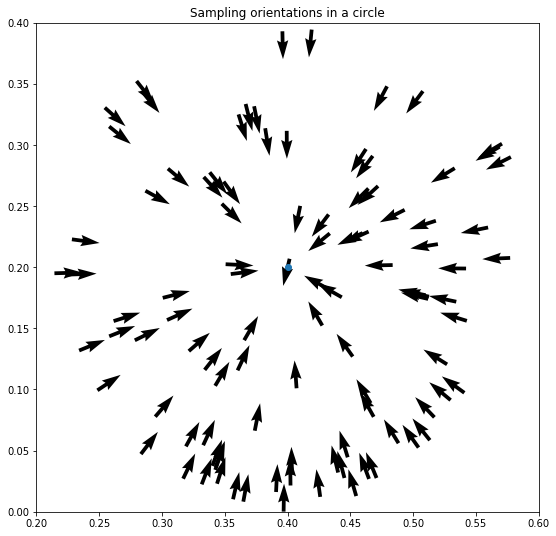

In [5]:
plane_center = np.array([0.4, 0.2])
plane_radius = 0.2

fig = plt.figure(figsize=FIGURE_SIZE)
ax = fig.add_subplot(111)
ax.set_xlim(plane_center[0] - plane_radius, plane_center[0] + plane_radius)
ax.set_ylim(plane_center[1] - plane_radius, plane_center[1] + plane_radius)

for i in range(100):
    position, _ = sample_position_in_radius(plane_center, plane_radius)
    plot_vector(ax, position, plane_center - position)
plt.scatter(plane_center[0], plane_center[1])
plt.title('Sampling orientations in a circle');

This demonstrates how the sampled frames look in 3d. The initial pregrasp frame is drawn in a larger size and with all three axes. The sampled frames are drawn in a smaller size and only with X and Z axes.

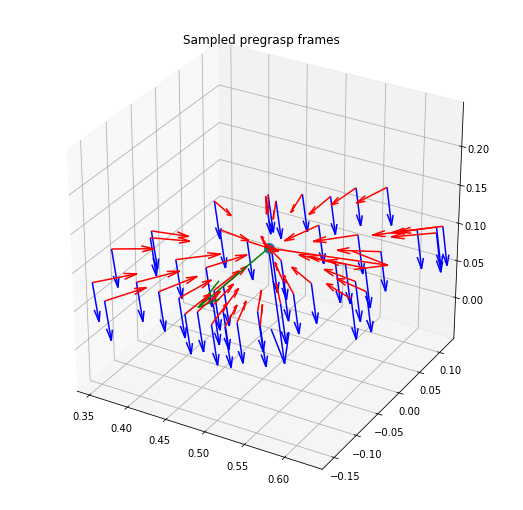

In [6]:
center_frame = tra.translation_matrix([0.49, -0.02, 0.1]).dot(
    tra.quaternion_matrix([0, 0.9976, 0, 0.0699]))
plane_radius = 0.2
center_frame_arrow_length = 0.15
sampled_frame_arrow_length = 0.05
scene_size = 0.3
samples = 50

fig2 = plt.figure(figsize=FIGURE_SIZE)
ax3d = fig2.add_subplot(111, projection='3d')
ax3d.set_xlim(center_frame[0, 3] - scene_size / 2, center_frame[0, 3] + scene_size / 2)
ax3d.set_ylim(center_frame[1, 3] - scene_size / 2, center_frame[1, 3] + scene_size / 2)
ax3d.set_zlim(center_frame[2, 3] - scene_size / 2, center_frame[2, 3] + scene_size / 2)

plot_frame(ax3d, center_frame, center_frame_arrow_length, to_plot=[0, 1, 2])

for i in range(samples):
    sampled_frame = sample_frame_on_xy_disk(center_frame, plane_radius)
    plot_frame(ax3d, sampled_frame, sampled_frame_arrow_length, to_plot=[0, 2])
ax3d.scatter(center_frame[0, 3], center_frame[1, 3], center_frame[2, 3], s=100)
    
plt.title('Sampled pregrasp frames');